# Visualisation

This section will explore the most widely used tools for visualizing electroencephalography (EEG) data. EEG is a technique that measures the electrical activity of the brain using electrodes placed on the scalp. Visualizing this complex data is crucial for researchers and clinicians to identify patterns, detect abnormalities, and gain insights into brain function.

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

# !pip install mne
import mne

## Import Dataset

Data collected from [PiEEG](https://pieeg.com/pieeg/) device that allow read EEG via RaspberryPi signle board computer.
Channel labels according to the international 10-20 system EEG Placement:
For EEG electrodes
* Ch1 - Fp1  
* Ch2 - Fp2
* Ch3 - T3  
* Ch4 - C3  
* Ch5 - Cz  
* Ch6 - C4     
* Ch7 - O1  
* Ch8 - O2   
and 2 clips electrodes (references and bias electrode)
* A1
* A2

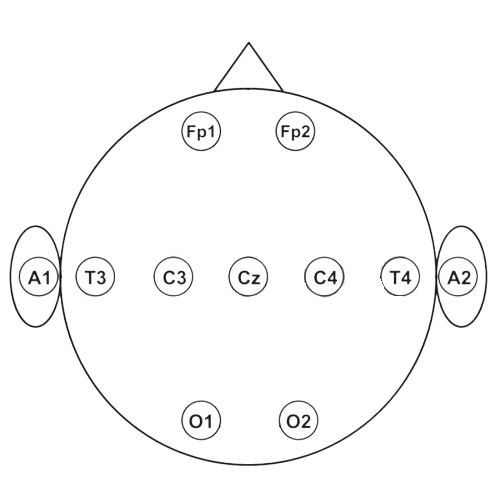

In [11]:
# load the Excel file as a DataFrame
eeg_data = pd.read_excel("datasets/dataset.xlsx")
# convert from Digital Value of Analog Digital converter (ADC) ADS1299 to microvolts

"""
converts raw EEG data from a 24-bit ADC (ranging from 0 to 16777215) into microvolts by normalizing the data,
scaling it to a 4.5V reference voltage, and converting to microvolts,
then rounding to two decimal places. This transformation is necessary for accurately interpreting EEG signals, which are typically measured in microvolts
"""

eeg_data = round(1000000*4.5*(eeg_data/16777216),2) # 2 to the power of 24 = 16777216
display(eeg_data.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,6410.24,791.55,9774.56,10304.67,3329.94,1008.38,8315.22,14155.44
1,6415.23,817.54,9780.35,10284.74,3338.84,999.47,8323.54,14007.41
2,6433.25,844.41,9796.80,10461.31,3358.23,965.94,8342.53,14262.67
3,6441.81,853.83,9803.88,10622.30,3365.77,931.53,8350.57,14621.96
4,6426.65,821.02,9788.67,10529.52,3346.22,952.10,8331.45,14570.11


## Libraries for Visualisation

The simplest libraries for data visualization are Matplotlib and Seaborn. These general-purpose Python libraries are also frequently used for creating custom visualizations of EEG data due to their flexibility and ease of use.   
For the most part, we will use the Matplotlib library, its main advantage over Seaborn is its ability to work in real-time.

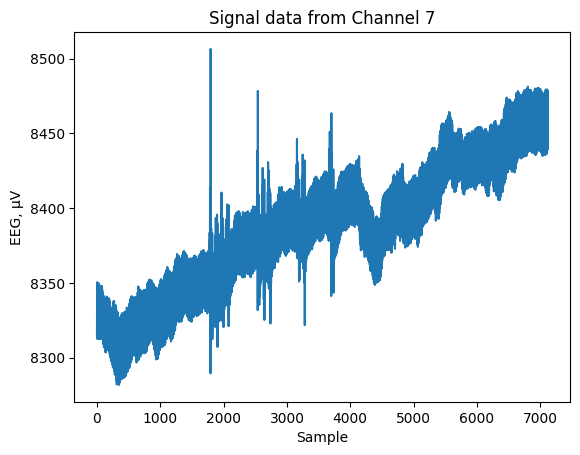

In [12]:
# select the data from the first channel for demo
channel = 6
channel_data = eeg_data.iloc[:, channel]

# plot the EEG data
plt.plot(channel_data)
plt.title("Signal data from Channel 7")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

## Band Pass Filter

Band-pass filtering is a common signal processing technique used in EEG (Electroencephalography) data analysis to isolate specific frequency bands of interest while removing unwanted frequencies. Band-pass filtering allows researchers to focus on particular brainwave rhythms that are relevant to their study. For example, you might want to extract the alpha, beta, or gamma waves from the EEG data.  

You can read more about band-pass filter in [Here](https://github.com/nargesyaghoubi/signal-processing/blob/main/Band-pass-filter.ipynb).


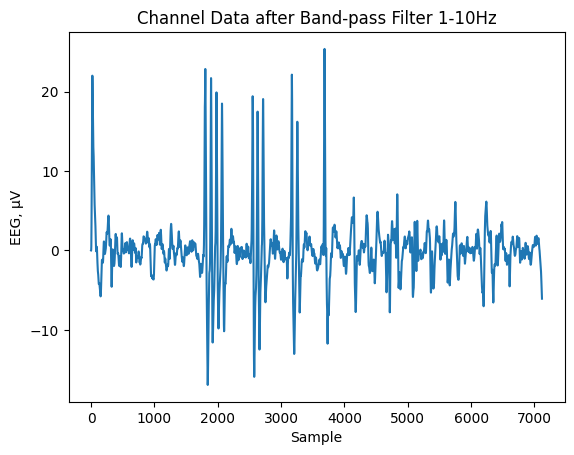

In [13]:
def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

channel_data_bp_filtered = channel_data.copy()  # copy the data
fps = 250  # sampling frequency
cutoff_high = 1  # cutoff frequency of the high-pass filter
cutoff_low = 10  # cutoff frequency of the low-pass filter
nyq = 0.5 * fps  # Nyquist frequency (half of the sampling frequency)

# apply the band-pass filter
channel_data_bp_filtered = butter_highpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_high,
    nyq=nyq,
    order=5)
channel_data_bp_filtered = butter_lowpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_low,
    nyq=nyq,
    order=4)

plt.plot(channel_data_bp_filtered)
plt.title("Channel Data after Band-pass Filter " + str(cutoff_high)+"-"+ str(cutoff_low)+"Hz")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

In [14]:
# Band Pass Filter filter the whole dataset
# Here we convert EEG data after filtering to Pandas format dataset
eeg_data_filtered = eeg_data.copy()
for channel in range(eeg_data.shape[1]):
    eeg_data_filtered.iloc[:, channel] = butter_highpass_filter(
        data=eeg_data.iloc[:, channel],
        cutoff=cutoff_high,
        nyq=nyq,
        order=5)
    eeg_data_filtered.iloc[:, channel] = butter_lowpass_filter(
        data=eeg_data_filtered.iloc[:, channel],
        cutoff=cutoff_low,
        nyq=nyq,
        order=4)
display(eeg_data_filtered.head())

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,0.001125,0.001760,0.001143,0.010915,0.001315,-0.002345,0.001236,0.017586
1,0.010236,0.019295,0.010539,0.086774,0.012536,-0.021042,0.011767,0.118750
2,0.049322,0.104243,0.050923,0.374177,0.062097,-0.099573,0.058385,0.421968
3,0.168165,0.373581,0.172512,1.213529,0.213303,-0.336886,0.201320,1.200482
4,0.448395,1.004480,0.454931,3.260925,0.565258,-0.906229,0.535972,3.183767


## Heat map

Spatial and Temporal Context: It provides a comprehensive view of how signals from different channels vary over time,
  enhancing the understanding of the spatial and temporal dynamics of brain activity.
Inter-channel Relationships: Visualizing data in 3D can highlight correlations and interactions between different EEG channels,
  which might not be as apparent in 2D plots.
Detailed Analysis: For datasets with multiple channels, 3D plots can help in identifying patterns, trends, and anomalies across all channels simultaneously, offering a more detailed analysis.

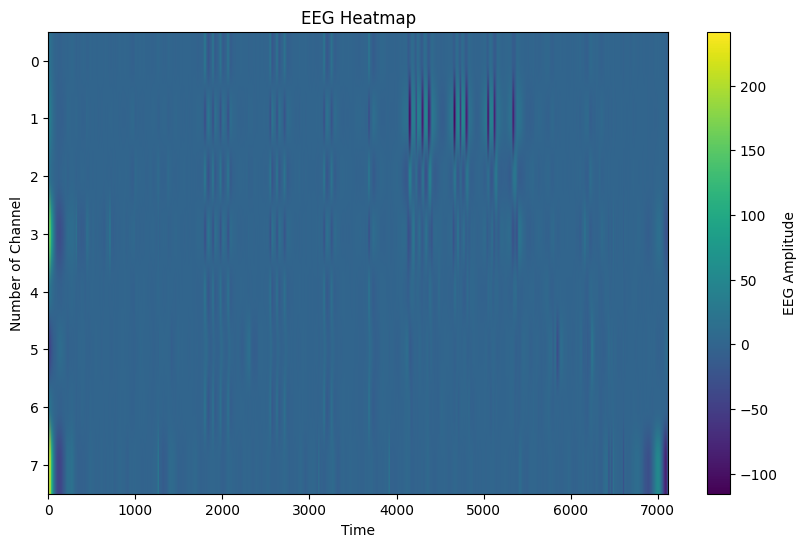

'\nThe graphs clearly show moments with chewing and blinking artifacts.\nYou can change the bandpass filter (as example for 1-30 Hz, 1-5 Hz etc ) and track the change on the heat map.\n'

In [15]:
# create the heatmap
"""
This script is essential for EEG data processing because it visualizes the filtered EEG signals across multiple channels over time, allowing for an intuitive assessment of brain activity patterns.
By using a heatmap, it highlights variations in EEG amplitude, making it easier to identify significant changes and patterns that may indicate neural events or artifacts.
This visualization aids in the quick identification of relevant features and anomalies in the EEG data, facilitating more effective analysis and interpretation.
"""
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(eeg_data_filtered.T, cmap='viridis', aspect='auto')
plt.colorbar(heatmap, label='EEG Amplitude')
plt.xlabel('Time')
plt.ylabel('Number of Channel')
plt.title('EEG Heatmap')
plt.show()

"""
The graphs clearly show moments with chewing and blinking artifacts.
You can change the bandpass filter (as example for 1-30 Hz, 1-5 Hz etc ) and track the change on the heat map.
"""

## 3D graph

3D visualization of EEG data is essential for several reasons:  
Enhanced Data Comprehension: It allows researchers to better understand complex spatial and temporal relationships within the data, providing a clearer overview of how different channels interact over time.  
Pattern Recognition: It aids in identifying patterns and anomalies across multiple channels that might be missed in 2D representations, improving diagnostic accuracy and insight.  
Interactive Exploration: It facilitates interactive exploration, enabling users to rotate and zoom into specific regions of interest, enhancing data analysis and interpretation.

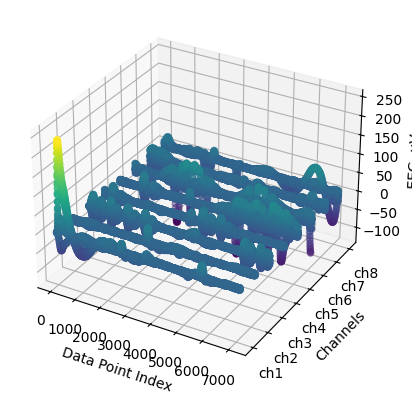

In [20]:
channel_names = ["ch1", "ch2", "ch3", "ch4", "ch5", "ch6", "ch7", "ch8"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create proper coordinates for the scatter plot
x, y = np.meshgrid(np.arange(channel_data_bp_filtered.shape[0]), np.arange(len(channel_names)))
# Flatten x and y to match the shape of z
x_flat = x.flatten()
y_flat = y.flatten()

# Make sure z has the same length as x_flat and y_flat
z = eeg_data_filtered.values.flatten()
# Verify that the shapes match
if len(z) != len(x_flat):
    # If using channel_data_bp_filtered would be more appropriate:
    z = channel_data_bp_filtered.flatten()

ax.scatter(x_flat, y_flat, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel('Data Point Index')
ax.set_ylabel('Channels')
ax.set_zlabel('EEG, µV')

ax.set_yticks(np.arange(len(channel_names)))
ax.set_yticklabels(channel_names)

plt.show()


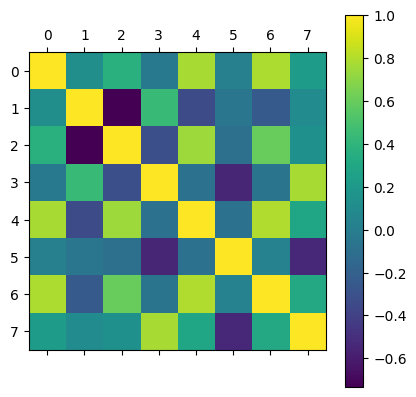

In [21]:

plt.matshow(eeg_data_filtered.corr())
plt.colorbar()
plt.show()